In [2]:
#There are two types main types of algorithms in Machine Learning:
#Classification and Regression.
#Classification is used when the output is a category, such as "spam" or "not spam".
#Regression is used when the output is a continuous value, such as a price or a temperature.

In [3]:
%pip install seaborn
%pip install opendatasets

#We are going to use four different models, Linear Regression, Logistic Regression, Decision Trees, and K-Nearest Neighbor.
#We need to import the necessary libraries for our models.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

#For evaluation of our models.
from sklearn import metrics
#for visualization of our models.
import matplotlib.pyplot as plt
import seaborn as sns
#for easy importing of datasets.
import opendatasets as od

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
#We will be working with tabular data
od.download("https://www.kaggle.com/datasets/zagarsuren/drug200")
od.download("https://www.kaggle.com/datasets/yasserh/housing-prices-dataset")
ds = pd.read_csv("housing-prices-dataset/Housing.csv")
ds2 = pd.read_csv("drug200/drug200.csv")
ds.dropna(inplace=True)
ds


Skipping, found downloaded files in ".\drug200" (use force=True to force download)
Skipping, found downloaded files in ".\housing-prices-dataset" (use force=True to force download)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
#We need to split our data into features and labels.
X = ds.drop("price", axis=1)
y = ds["price"]

### Preprocessing: Regression

In [6]:
#Like we discussed in the previous lesson, we'll be using StandardScaler to scale our features and LabelEncoder to encode our labels.
#StandardScaler is used to standardize the features by removing the mean and scaling to unit variance.
#labelEncoder is used to convert categorical labels into numerical labels.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
le = LabelEncoder()
for col in ['mainroad', 'hotwaterheating', 'airconditioning', 'furnishingstatus', 'basement', 'guestroom', 'prefarea']:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = sc.fit_transform(y_train.values.reshape(-1, 1))
y_test = sc.transform(y_test.values.reshape(-1, 1))

print(X_train)

[[ 0.38416819  0.05527092  1.53917323 ...  0.36795665 -0.55262032
  -1.40940148]
 [ 0.9291807   0.05527092  1.53917323 ...  2.70998729 -0.55262032
  -0.07931697]
 [-0.60775457 -1.28351359 -0.5579503  ...  1.53897197 -0.55262032
  -1.40940148]
 ...
 [-0.29709744  0.05527092  1.53917323 ...  0.36795665 -0.55262032
  -1.40940148]
 [-0.5060189  -1.28351359 -0.5579503  ... -0.80305867 -0.55262032
   1.25076755]
 [ 0.15707965  0.05527092  1.53917323 ...  0.36795665 -0.55262032
  -0.07931697]]


### Training: Regression

In [7]:
#Making the model
linear_model = LinearRegression()

#Actually training the model is as easy as using one line of code.
linear_model.fit(X_train, y_train)

LinearRegression()

### Evaluation: Regression

Text(0, 0.5, 'y_pred')

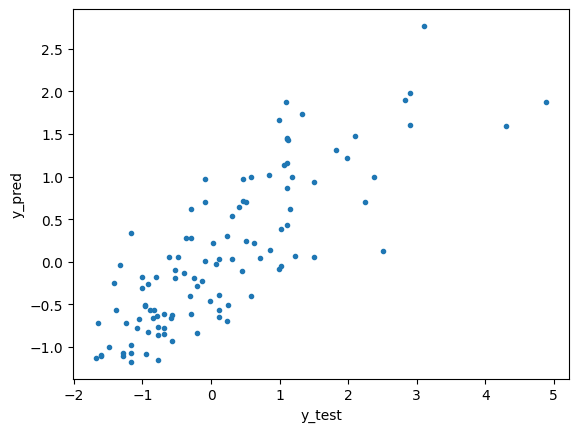

In [8]:
#Evaluating
y_pred = linear_model.predict(X_test)
#Since this is regression, we use what is called "R2 Scoring"
#Simply put, it measures how much of the relationship between features and labels the model can predict
r2 = metrics.r2_score(y_test, y_pred)
#Best possible score is 1.0 (perfection) and worst is -1.0 (completely off)
plt.scatter(y_test, y_pred, marker = ".")
plt.xlabel("y_test")
plt.ylabel("y_pred")


In [9]:
#In this case, the model isn't doing terribly
print(f'r2 Score: {r2}')

r2 Score: 0.649475419226779
